# MARATONA BEHIND THE CODE 2020

## DESAFIO 2: PARTE 1

## Testes com modelo Random Forest
- Autor: Rodrigo Lima
- LinkedIN: https://www.linkedin.com/in/rodrigolima82/


![title](virtual_assistance.png)

# Parte 01. Importando as bibliotecas

In [1]:
# Pacotes padrao
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Pacote scipy
from scipy.stats import kurtosis, skew

# Pacote do sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pacote imblearn
import imblearn
from imblearn.over_sampling import SMOTE

# Pacote LOFO para Feature Importance
from lofo import LOFOImportance, Dataset, plot_importance

# Desativando warnings no jupyter
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Parte 02. Carregando o Dataset

In [2]:
# Carregando o dataset da competição
dados = pd.read_csv('../data/dataset_desafio_2.csv')

# Visualizando os primeiros registros
dados.head()

MATRICULA                       NOME  REPROVACOES_DE  REPROVACOES_EM  \
0     502375          Márcia Illiglener               0               0   
1     397093   Jason Jytereoman Izoimum               0               0   
2     915288  Bartolomeu Inácio da Gama               0               0   
3     192652            Fernanda Guedes               1               3   
4     949491     Alessandre Borba Gomes               1               3   

   REPROVACOES_MF  REPROVACOES_GO  NOTA_DE  NOTA_EM  NOTA_MF  NOTA_GO  INGLES  \
0               0               0      6.2      5.8      4.6      5.9     0.0   
1               0               0      6.0      6.2      5.2      4.5     1.0   
2               0               0      7.3      6.7      7.1      7.2     0.0   
3               1               1      0.0      0.0      0.0      0.0     1.0   
4               1               1      0.0      0.0      0.0      0.0     1.0   

   H_AULA_PRES  TAREFAS_ONLINE  FALTAS       PERFIL  
0            2               4       3       EXATAS  
1            2               4       3       EXATAS  
2            5               0       3      HUMANAS  
3            4               4       4  DIFICULDADE  
4            5               2       5  DIFICULDADE

# Parte 03. EDA (Análise Exploratória dos Dados)
> Nesta fase estou usando a biblioteca **Pandas Profile** pois automatiza o processo e nos traz uma visão geral do dataset
> Para mais detalhes, segue link da documentação: https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

### Dicionário de dados


- **MATRICULA**       - número de matrícula do estudante
- **NOME**            - nome completo do estudante
- **REPROVACOES_DE**  - número de reprovações na disciplina de ``Direito Empresarial``
- **REPROVACOES_EM**  - número de reprovações na disciplina de ``Empreendedorismo``
- **REPROVACOES_MF**  - número de reprovações na disciplina de ``Matemática Financeira``
- **REPROVACOES_GO**  - número de reprovações na disciplina de ``Gestão Operacional``
- **NOTA_DE**         - média simples das notas do aluno na disciplina de ``Direito Empresarial`` (0-10)
- **NOTA_EM**         - média simples das notas do aluno na disciplina de ``Empreendedorismo`` (0-10)
- **NOTA_MF**         - média simples das notas do aluno na disciplina de ``Matemática Financeira`` (0-10)
- **NOTA_GO**         - média simples das notas do aluno na disciplina de ``Gestão Operacional`` (0-10)
- **INGLES**          - variável binária que indica se o estudante tem conhecimento em língua inglesa (0 -> sim ou 1 -> não).
- **H_AULA_PRES**     - horas de estudo presencial realizadas pelo estudante
- **TAREFAS_ONLINE**  - número de tarefas online entregues pelo estudante
- **FALTAS**          - número de faltas acumuladas do estudante (todas disciplinas)

A variável-alvo é:

- **PERFIL**          - uma *string* que indica uma de cinco possibilidades: 
    - "EXCELENTE"      - Estudante não necessita de mentoria
    - "MUITO BOM"      - Estudante não necessita de mentoria
    - "HUMANAS"        - Estudante necessita de mentoria exclusivamente em matérias com conteúdo de ciências humanas
    - "EXATAS"         - Estudante necessita de mentoria apenas em disciplinas com conteúdo de ciências exatas
    - "DIFICULDADE"    - Estudante necessita de mentoria em duas ou mais disciplinas

In [3]:
# Cria o objeto profile
profile = pp.ProfileReport(dados, title="Maratona IBM - Desafio 02", explorative=True)

# Executa o relatório e mostra no Jupyter
profile

### Observações:
> - MATRICULA: apesar de parecer ser um campo identificador unico, existem alguns alunos com a mesma matricula
> - NOME: alguns poucos nomes se repetem, mas 99.3% dos registros sao unicos

### Verificando quais são os PERFIS dos alunos que tem NOTAS vazias

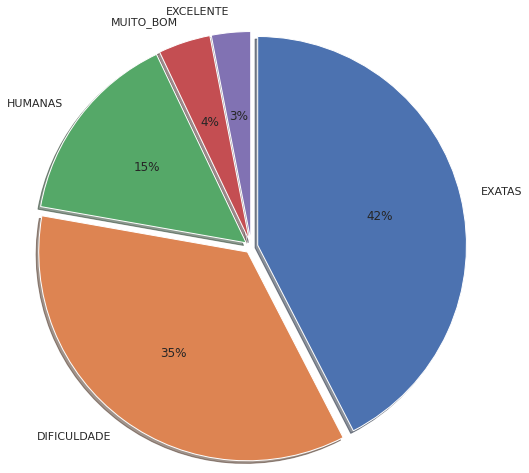

In [4]:
# Filtranso apenas as notas vazias de Gestao Operacional
dados_nulos = pd.isnull(dados["NOTA_GO"])  
tmp = dados[dados_nulos].sort_values(by=['PERFIL'],ascending=False)

# Percentual de cada valor da variável alvo
percentual = round(tmp.PERFIL.value_counts() / len(tmp.index) * 100, 0)

# Labels
labels = ['EXATAS','DIFICULDADE','HUMANAS','MUITO_BOM','EXCELENTE']

# Plot
sns.set(rc={'figure.figsize':(6, 6)})
plt.axis("equal")
plt.pie(percentual , 
        labels = labels,
        radius = 1.6,
        autopct = '%1.0f%%',
        explode = [0.05,0.05,0.05,0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

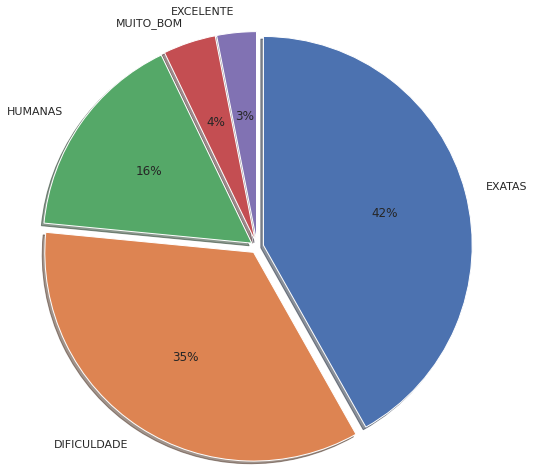

In [5]:
# Filtranso apenas as notas vazias de Ingles
dados_nulos = pd.isnull(dados["INGLES"])  
tmp = dados[dados_nulos].sort_values(by=['PERFIL'],ascending=False)

# Percentual de cada valor da variável alvo
percentual = round(tmp.PERFIL.value_counts() / len(tmp.index) * 100, 0)

# Labels
labels = ['EXATAS','DIFICULDADE','HUMANAS','MUITO_BOM','EXCELENTE']

# Plot
sns.set(rc={'figure.figsize':(6, 6)})
plt.axis("equal")
plt.pie(percentual , 
        labels = labels,
        radius = 1.6,
        autopct = '%1.0f%%',
        explode = [0.05,0.05,0.05,0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

### Observações:
> - As Features que contém valores nulos tem praticamente o mesmo percentual de PERFIS que o dataset completo

# Parte 04. Feature Engineering
> Nesta fase estarei trabalhando na manipulação dos dados
> Importante realizar o mínimo de alterações para não descaracterizar as informações
> Vou remover algumas colunas que identifiquei na análise exploratória e criar outras colunas que julgo interessante

**Agora a parte importante - decidir o que fazer!**

- Falta os dados sobre **NOTA_GO** em 17.7% dos registros. 
- Falta os dados sobre **INGLES** em 3.3% dos registros. 

- O NOME tem 19867 registros distintos, porém, alguns repetidos
- A MATRICULA também tem mais de 99% dos registros unicos, porém, alguns se repetem

O que fazer?

**Decisão:**

- 1- Vou descartar as features MATRICULA e NOME, pois são identificadores únicos e não ajuda na modelagem preditiva
- 2- Vou remover todos os registros nulos

**Alternativas:**

- Preencher as notas nulas com valor zero. Essa abordagem influencia diretamente o modelo, visto que estamos atribuindo uma nota ruim a todos os alunos que nao tiveram essa avaliacao.


In [6]:
# Remove as variáveis de ID
dados.drop(['MATRICULA', 'NOME'], axis = 1, inplace = True)

In [7]:
# Remove todos os registros que tem algum dado vazio
dados.dropna(inplace=True)

In [8]:
# Categorizar a coluna target
dados['PERFIL'] = dados['PERFIL'].astype("category").cat.codes

In [9]:
# Criar novas features de agregação

# Defini as colunas que serao agregadas
cols   =  [['NOTA_DE'],['NOTA_EM'],['NOTA_MF'],['NOTA_GO']]
target = 'PERFIL'

# Percorre as colunas da lista para agregacao
for col in cols:
    col_name = '_'.join(col)+'_'
    dados[col_name + 'mean'] = dados.groupby(col)[target].transform('mean').astype(np.float16)
    dados[col_name + 'median'] = dados.groupby(col)[target].transform('median').astype(np.float16)
    dados[col_name + 'max'] = dados.groupby(col)[target].transform('max').astype(np.float16)
    dados[col_name + 'min'] = dados.groupby(col)[target].transform('min').astype(np.float16)
    dados[col_name + 'std'] = dados.groupby(col)[target].transform('std').astype(np.float16)
    dados[col_name + 'range'] = dados[col_name + 'max'] - dados[col_name + 'min']
    dados[col_name + 'skew'] = dados.groupby(col)[target].transform('skew').astype(np.float16)
    dados[col_name + 'mad'] = dados.groupby(col)[target].transform('mad').astype(np.float16)
    dados[col_name + 'q25'] = dados.groupby(col)[target].transform(lambda x: x.drop_duplicates().quantile(0.25)).astype(np.float16)
    dados[col_name + 'q75'] = dados.groupby(col)[target].transform(lambda x: x.drop_duplicates().quantile(0.75)).astype(np.float16)
    dados[col_name + 'q95'] = dados.groupby(col)[target].transform(lambda x: x.drop_duplicates().quantile(0.95)).astype(np.float16)
    dados[col_name + 'iqr'] = dados[col_name + 'q75'] - dados[col_name + 'q25']


In [10]:
# Remover os valores missing depois das transformacoes
dados.dropna(inplace=True)

In [11]:
# Visualizando o dataset final
print(dados.shape)
dados.head()

(13319, 61)


REPROVACOES_DE  REPROVACOES_EM  REPROVACOES_MF  REPROVACOES_GO  NOTA_DE  \
0               0               0               0               0      6.2   
1               0               0               0               0      6.0   
2               0               0               0               0      7.3   
3               1               3               1               1      0.0   
4               1               3               1               1      0.0   

   NOTA_EM  NOTA_MF  NOTA_GO  INGLES  H_AULA_PRES  ...  NOTA_GO_max  \
0      5.8      4.6      5.9     0.0            2  ...          4.0   
1      6.2      5.2      4.5     1.0            2  ...          4.0   
2      6.7      7.1      7.2     0.0            5  ...          4.0   
3      0.0      0.0      0.0     1.0            4  ...          1.0   
4      0.0      0.0      0.0     1.0            5  ...          1.0   

   NOTA_GO_min  NOTA_GO_std  NOTA_GO_range  NOTA_GO_skew  NOTA_GO_mad  \
0          0.0     1.039062            4.0      0.970703     0.819336   
1          0.0     0.906250            4.0      1.503906     0.664551   
2          0.0     1.032227            4.0     -0.556641     0.841797   
3          0.0     0.136108            1.0      7.078125     0.037018   
4          0.0     0.136108            1.0      7.078125     0.037018   

   NOTA_GO_q25  NOTA_GO_q75  NOTA_GO_q95  NOTA_GO_iqr  
0         1.00         3.00     3.800781          2.0  
1         0.75         3.25     3.849609          2.5  
2         1.00         3.00     3.800781          2.0  
3         0.25         0.75     0.950195          0.5  
4         0.25         0.75     0.950195          0.5  

[5 rows x 61 columns]

### Avaliando a correlação dos dados após as transformações

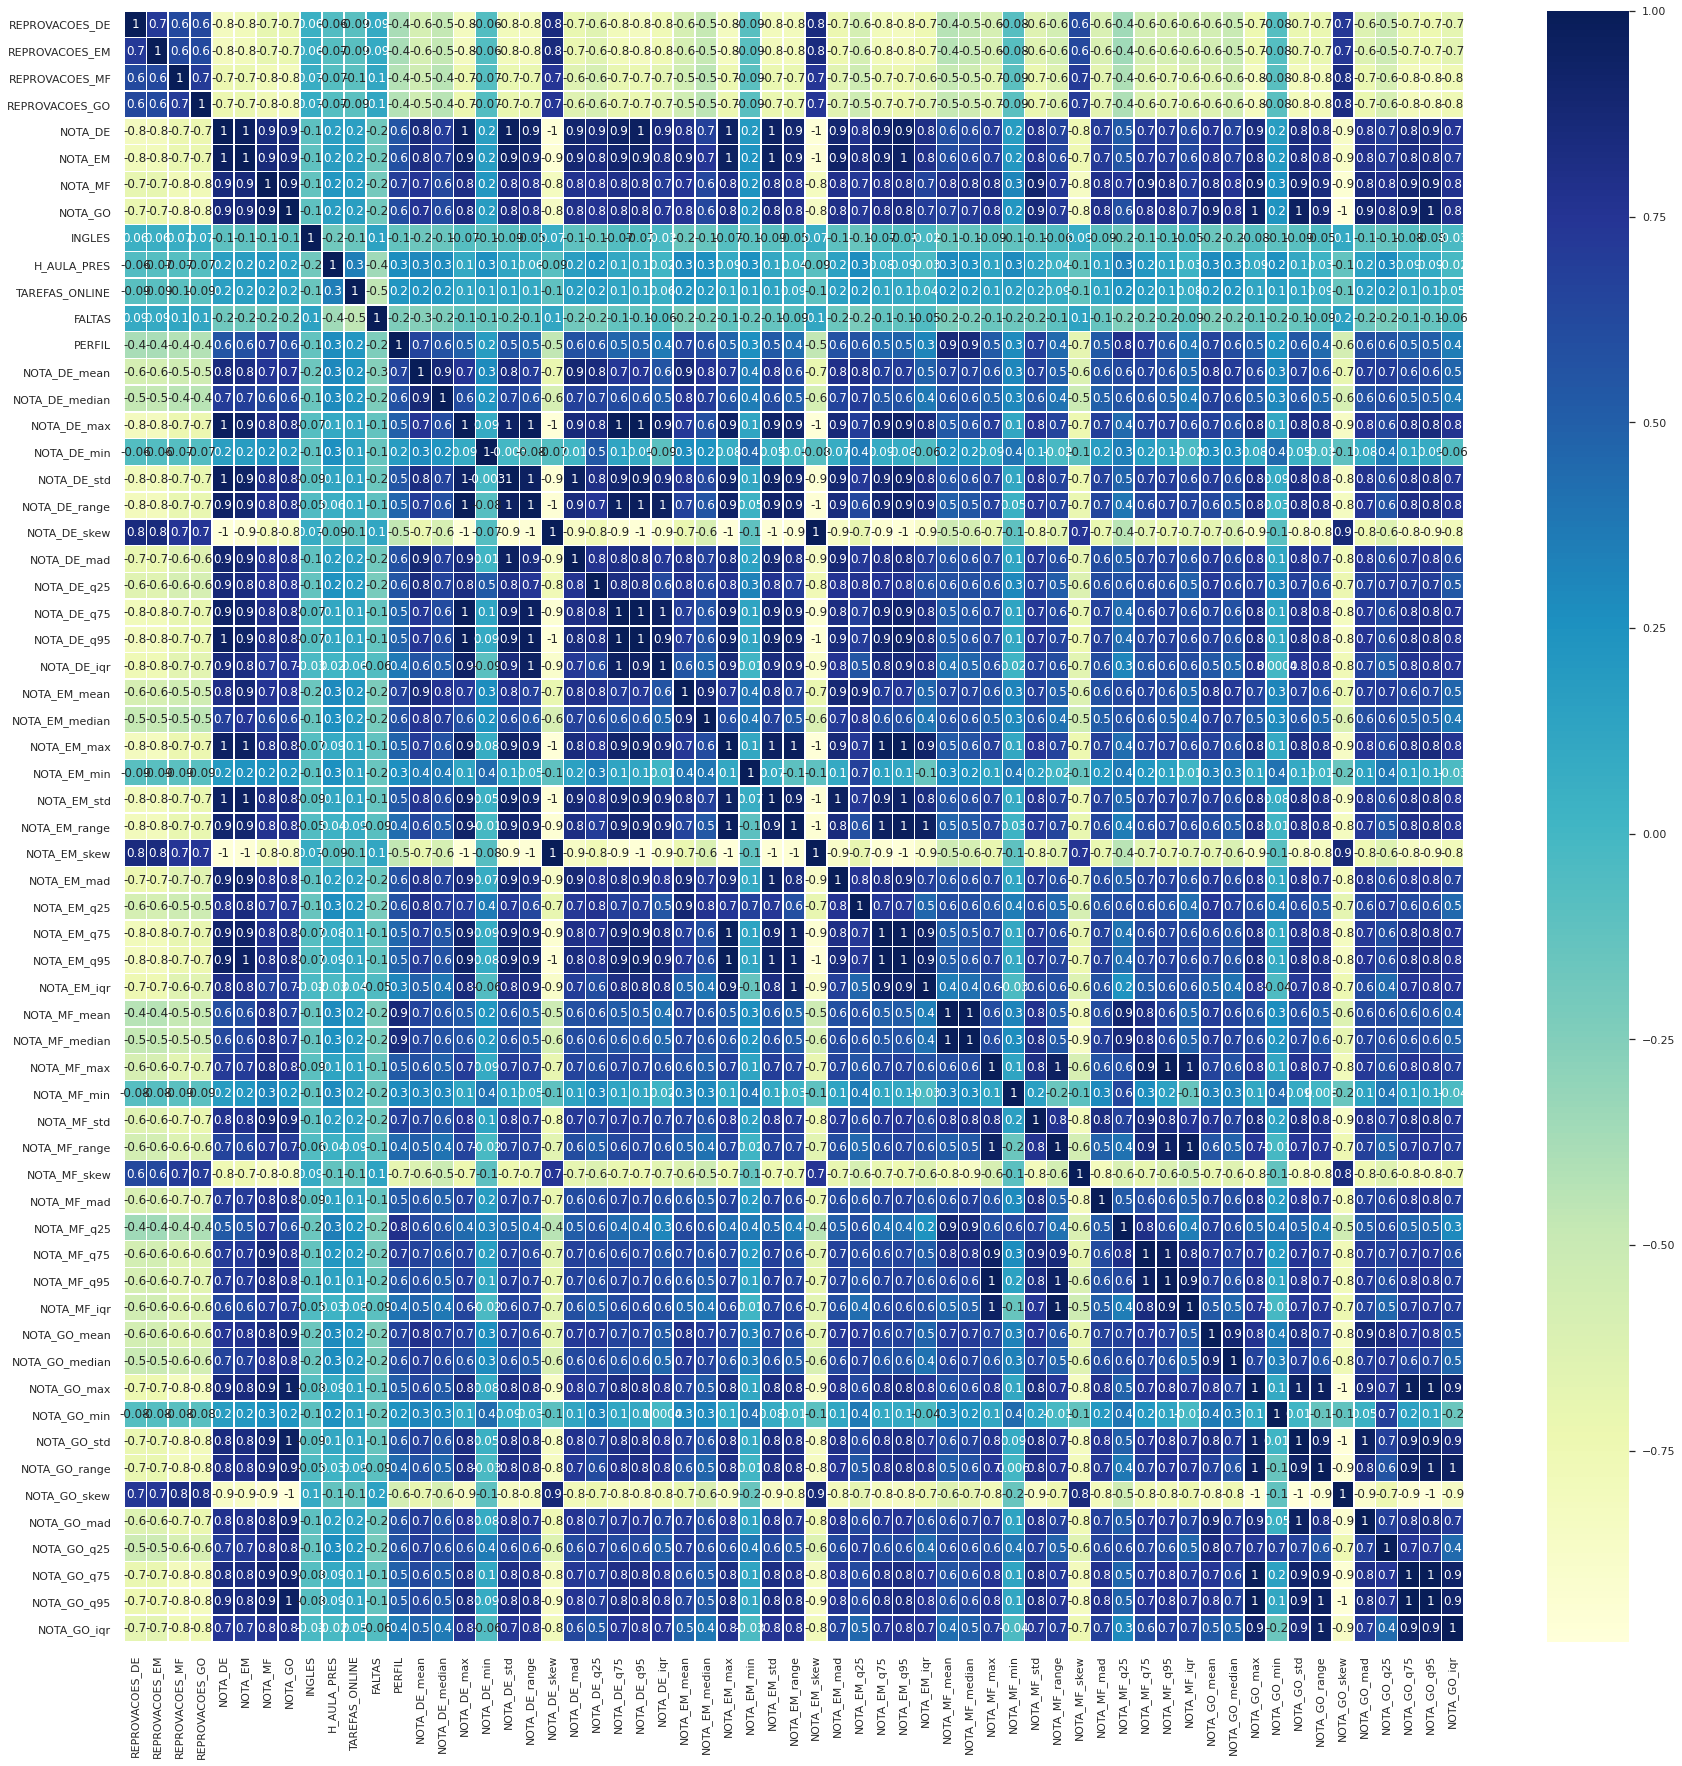

In [12]:
sns.set(rc={'figure.figsize':(30, 30)})
corr = dados.corr()
plt.figure() 
ax = sns.heatmap(corr, linewidths=.5, annot=True, cmap="YlGnBu", fmt='.1g')
plt.show()

### Removendo colunas altamente correlacionadas

In [13]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.99:
            if columns[j]:
                columns[j] = False

best_features = dados.columns[columns].values
drop_columns  = dados.columns[columns == False].values

# Remove coluna target
best_features = np.delete(best_features, 12)

print('Melhores Features: ',best_features)
print('\nFeatures para Remover: ', drop_columns)

Melhores Features:  ['REPROVACOES_DE' 'REPROVACOES_EM' 'REPROVACOES_MF' 'REPROVACOES_GO'
 'NOTA_DE' 'NOTA_EM' 'NOTA_MF' 'NOTA_GO' 'INGLES' 'H_AULA_PRES'
 'TAREFAS_ONLINE' 'FALTAS' 'NOTA_DE_mean' 'NOTA_DE_median' 'NOTA_DE_max'
 'NOTA_DE_min' 'NOTA_DE_std' 'NOTA_DE_range' 'NOTA_DE_skew' 'NOTA_DE_mad'
 'NOTA_DE_q25' 'NOTA_DE_iqr' 'NOTA_EM_mean' 'NOTA_EM_median' 'NOTA_EM_max'
 'NOTA_EM_min' 'NOTA_EM_std' 'NOTA_EM_range' 'NOTA_EM_mad' 'NOTA_EM_q25'
 'NOTA_EM_q75' 'NOTA_EM_iqr' 'NOTA_MF_mean' 'NOTA_MF_median' 'NOTA_MF_max'
 'NOTA_MF_min' 'NOTA_MF_std' 'NOTA_MF_range' 'NOTA_MF_skew' 'NOTA_MF_mad'
 'NOTA_MF_q25' 'NOTA_MF_q75' 'NOTA_MF_iqr' 'NOTA_GO_mean' 'NOTA_GO_median'
 'NOTA_GO_max' 'NOTA_GO_min' 'NOTA_GO_std' 'NOTA_GO_range' 'NOTA_GO_skew'
 'NOTA_GO_mad' 'NOTA_GO_q25' 'NOTA_GO_iqr']

Features para Remover:  ['NOTA_DE_q75' 'NOTA_DE_q95' 'NOTA_EM_skew' 'NOTA_EM_q95' 'NOTA_MF_q95'
 'NOTA_GO_q75' 'NOTA_GO_q95']


# Parte 05. Feature Importance
> Nesta fase estarei verificando quais são as features de maior importancia para as previsoes do modelo

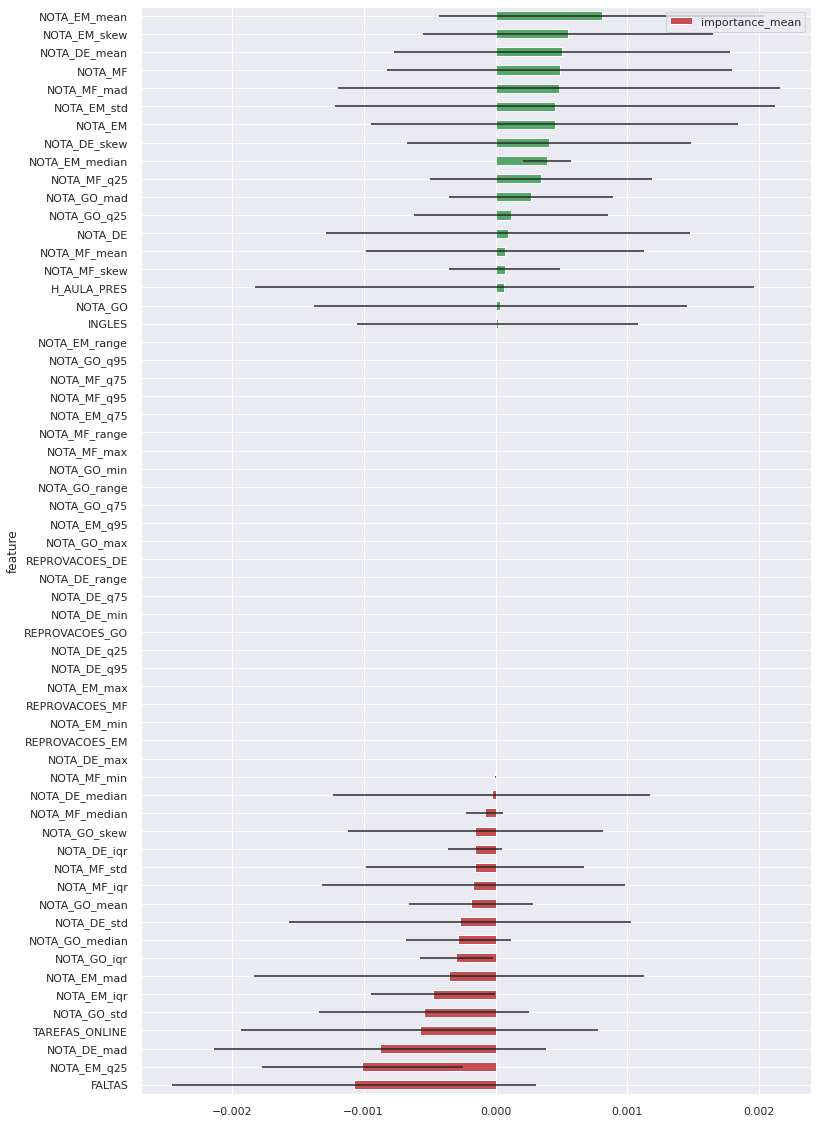

In [26]:
# define the validation scheme
cv = KFold(n_splits=4, shuffle=False, random_state=0)

# define the binary target and the features
dataset = Dataset(df=dados, target="PERFIL", features=[col for col in dados.columns if col != target])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="neg_mean_absolute_error")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))

# Parte 06. Modelagem Preditiva
> Nesta fase estarei construindo os modelos preditivos
> Vou utilizar apenas o algoritmo Random Forest neste notebook, que servirá com baseline para as demais versoes

### Random Forest versao 01
> - Rodando a primeira versao com todas as features criadas
> - Usando train_test_split com 20% dos dados para testes
> - Sem aplicar nenhuma técnica de balanceamento

Acurácia : 79.72972972972973
Sensibilidade : 0.9173630454967502
Especificidade : 0.7665580890336591


              precision    recall  f1-score   support

           0       0.88      0.74      0.81       956
           1       0.80      0.91      0.85      1085
           2       0.62      0.61      0.61        87
           3       0.71      0.94      0.81       393
           4       0.30      0.04      0.07       143

    accuracy                           0.80      2664
   macro avg       0.66      0.65      0.63      2664
weighted avg       0.78      0.80      0.78      2664



importance
NOTA_MF           0.085684
NOTA_MF_mean      0.082033
NOTA_MF_median    0.066767
NOTA_MF_q25       0.063997
NOTA_MF_skew      0.049139
NOTA_GO           0.045391
NOTA_MF_q75       0.045139
NOTA_GO_mean      0.040542
REPROVACOES_MF    0.033471
NOTA_GO_skew      0.030194
REPROVACOES_GO    0.029896
NOTA_MF_std       0.029373
NOTA_GO_std       0.026517
NOTA_EM           0.026129
NOTA_MF_mad       0.025221
NOTA_GO_mad       0.023652
NOTA_EM_mean      0.022723
NOTA_DE           0.021242
NOTA_GO_q25       0.021153
NOTA_DE_mean      0.020977
NOTA_GO_median    0.017938
H_AULA_PRES       0.016406
NOTA_EM_mad       0.015921
NOTA_DE_skew      0.015874
NOTA_EM_std       0.015703
NOTA_GO_max       0.014633
NOTA_DE_std       0.014591
NOTA_DE_mad       0.011384
TAREFAS_ONLINE    0.011356
FALTAS            0.010889
NOTA_GO_iqr       0.008935
NOTA_GO_range     0.007610
NOTA_DE_q25       0.006319
NOTA_DE_median    0.004980
NOTA_EM_median    0.004678
NOTA_EM_q25       0.003449
NOTA_DE_iqr       0.003383
INGLES            0.003175
NOTA_MF_iqr       0.003168
NOTA_DE_max       0.002911
NOTA_DE_range     0.002790
NOTA_EM_iqr       0.002077
NOTA_EM_q75       0.001949
NOTA_MF_range     0.001885
NOTA_EM_range     0.001779
NOTA_MF_min       0.001776
NOTA_EM_max       0.001526
NOTA_GO_min       0.001456
NOTA_EM_min       0.000712
NOTA_DE_min       0.000687
NOTA_MF_max       0.000623
REPROVACOES_DE    0.000160
REPROVACOES_EM    0.000037

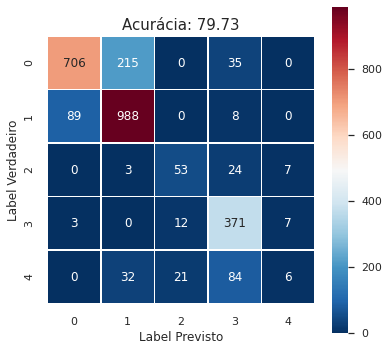

In [28]:
# Vamos armazenar 'PERFIL' no rótulo (y) e o restante das colunas em X
X = dados[best_features]
y = dados['PERFIL']

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o modelo
modelo_rf_v1 = RandomForestClassifier(random_state      = 42, 
                                      n_estimators      = 2000, 
                                      min_samples_split = 10)


# Treinamento do modelo
modelo_rf_v1.fit(X_train, y_train)

# Previsões para cada classe com dados de teste
rf_y_pred = modelo_rf_v1.predict(X_test)

# Calcula o score com dados de teste
rf_accuracy_v1 = modelo_rf_v1.score(X_test, y_test) * 100

# Print
print("Acurácia :", rf_accuracy_v1)

# Cria a matriz de confusão
conf_matriz_rf = confusion_matrix(y_test, rf_y_pred)
    
# Calcula especificidade e sensibilidade
speci_rf = conf_matriz_rf[0,0] / (conf_matriz_rf[0,0] + conf_matriz_rf[0,1])
sensi_rf = conf_matriz_rf[1,1] / (conf_matriz_rf[1,0] + conf_matriz_rf[1,1])

# Print
print('Sensibilidade :', sensi_rf)
print('Especificidade :', speci_rf)
print('\n')

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz_rf, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(rf_accuracy_v1), size = 15)

# Relatório de Classificação
print(classification_report(y_test, rf_y_pred))

# Extrai as variáveis mais importantes
importances = modelo_rf_v1.feature_importances_

# Converte a saída em dataframe
feature_importances = pd.DataFrame(modelo_rf_v1.feature_importances_,
                                   index = X.columns,
                                   columns = ['importance']).sort_values('importance', ascending = False) 

# Imprime as features mais importantes
feature_importances

### Random Forest versao 02
> - Rodando a segunda versao com apenas as melhores features identificadas no LOFO (media maior ou igual a zero)
> - Usando train_test_split com 20% dos dados para testes
> - Sem aplicar nenhuma técnica de balanceamento

Acurácia : 79.35435435435436
Sensibilidade : 0.9173630454967502
Especificidade : 0.7619565217391304
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       956
           1       0.80      0.91      0.85      1085
           2       0.59      0.57      0.58        87
           3       0.71      0.94      0.81       393
           4       0.20      0.03      0.05       143

    accuracy                           0.79      2664
   macro avg       0.64      0.64      0.62      2664
weighted avg       0.78      0.79      0.77      2664



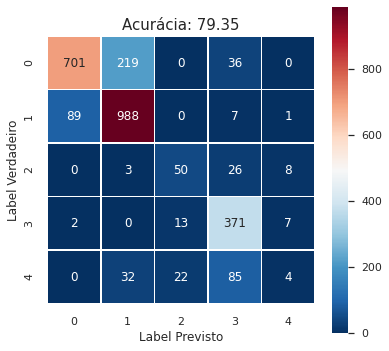

In [36]:
# Selecionando as melhoras features
features = importance_df[importance_df['importance_mean'] >= 0]['feature']

# Vamos armazenar 'PERFIL' no rótulo (y) e o restante das colunas em X
X = dados[features]
y = dados['PERFIL']

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o modelo
modelo_rf_v2 = RandomForestClassifier(random_state      = 42, 
                                      n_estimators      = 2000, 
                                      min_samples_split = 10)


# Treinamento do modelo
modelo_rf_v2.fit(X_train, y_train)

# Previsões para cada classe com dados de teste
rf_y_pred = modelo_rf_v2.predict(X_test)

# Calcula o score com dados de teste
rf_accuracy_v2 = modelo_rf_v2.score(X_test, y_test) * 100

# Print
print("Acurácia :", rf_accuracy_v2)

# Cria a matriz de confusão
conf_matriz_rf = confusion_matrix(y_test, rf_y_pred)
    
# Calcula especificidade e sensibilidade
speci_rf = conf_matriz_rf[0,0] / (conf_matriz_rf[0,0] + conf_matriz_rf[0,1])
sensi_rf = conf_matriz_rf[1,1] / (conf_matriz_rf[1,0] + conf_matriz_rf[1,1])

# Print
print('Sensibilidade :', sensi_rf)
print('Especificidade :', speci_rf)

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz_rf, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(rf_accuracy_v2), size = 15)

# Relatório de Classificação
print(classification_report(y_test, rf_y_pred))

### Random Forest versão 03
> - Rodando a terceira versao com apenas as melhores features identificadas no LOFO (media maior ou igual a zero)
> - Usando train_test_split com 20% dos dados para testes
> - Aplicando o balanceamento SMOTE

Acurácia : 87.35758912164646
Sensibilidade : 0.9092575618698442
Especificidade : 0.7643064985451018
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1066
           1       0.78      0.91      0.84      1095
           2       0.93      0.97      0.95      1105
           3       0.88      0.90      0.89      1093
           4       0.91      0.85      0.88      1083

    accuracy                           0.87      5442
   macro avg       0.88      0.87      0.87      5442
weighted avg       0.88      0.87      0.87      5442



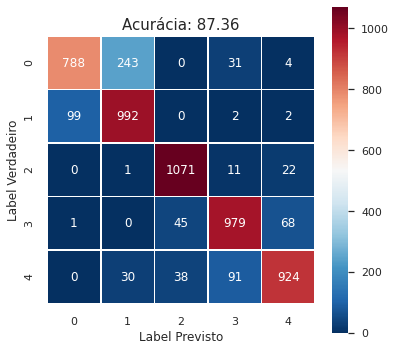

In [37]:
# Selecionando as melhoras features
#features = ['INGLES', 'NOTA_EM', 'H_AULA_PRES', 'NOTA_MF_iqr', 'NOTA_GO_q25', 'NOTA_DE_min', 'NOTA_MF_mean','REPROVACOES_GO']

# Selecionando as melhoras features
features = importance_df[importance_df['importance_mean'] >= 0]['feature']


# Vamos armazenar 'PERFIL' no rótulo (y) e o restante das colunas em X
X = dados[features]
y = dados['PERFIL']

# Realizando o balanceamento dos dados para cada classe usando SMOTE
sm = SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o modelo
modelo_rf_v3 = RandomForestClassifier(random_state      = 42, 
                                      n_estimators      = 2000, 
                                      min_samples_split = 10)


# Treinamento do modelo
modelo_rf_v3.fit(X_train, y_train)

# Previsões para cada classe com dados de teste
rf_y_pred = modelo_rf_v3.predict(X_test)

# Calcula o score com dados de teste
rf_accuracy_v3 = modelo_rf_v3.score(X_test, y_test) * 100

# Print
print("Acurácia :", rf_accuracy_v3)

# Cria a matriz de confusão
conf_matriz_rf = confusion_matrix(y_test, rf_y_pred)
    
# Calcula especificidade e sensibilidade
speci_rf = conf_matriz_rf[0,0] / (conf_matriz_rf[0,0] + conf_matriz_rf[0,1])
sensi_rf = conf_matriz_rf[1,1] / (conf_matriz_rf[1,0] + conf_matriz_rf[1,1])

# Print
print('Sensibilidade :', sensi_rf)
print('Especificidade :', speci_rf)

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz_rf, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(rf_accuracy_v3), size = 15)

# Relatório de Classificação
print(classification_report(y_test, rf_y_pred))

### Random Forest versão 04
> - Rodando a quarta versao com apenas as melhores features identificadas no LOFO (media maior ou igual a zero)
> - Usando train_test_split com 15% dos dados para testes
> - Aplicando o balanceamento SMOTE

Acurácia : 87.67760901518862
Sensibilidade : 0.915129151291513
Especificidade : 0.7634961439588689
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       803
           1       0.78      0.91      0.84       818
           2       0.93      0.96      0.94       822
           3       0.89      0.90      0.89       834
           4       0.91      0.87      0.89       805

    accuracy                           0.88      4082
   macro avg       0.88      0.88      0.88      4082
weighted avg       0.88      0.88      0.88      4082



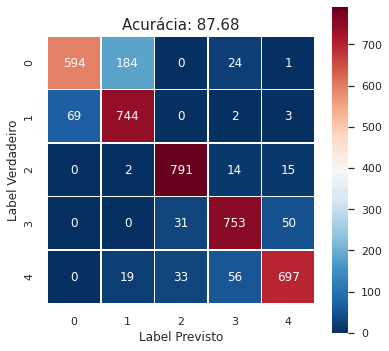

In [38]:
# Selecionando as melhoras features
features = importance_df[importance_df['importance_mean'] >= 0]['feature']

# Selecionando as melhoras features
#features = ['INGLES', 'NOTA_EM', 'H_AULA_PRES', 'NOTA_MF_iqr', 'NOTA_GO_q25', 'NOTA_DE_min', 'NOTA_MF_mean','REPROVACOES_GO']

# Vamos armazenar 'PERFIL' no rótulo (y) e o restante das colunas em X
X = dados[features]
y = dados['PERFIL']

# Realizando o balanceamento dos dados para cada classe usando SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Cria o modelo
modelo_rf_v4 = RandomForestClassifier(random_state      = 42, 
                                      n_estimators      = 2000, 
                                      min_samples_split = 10)


# Treinamento do modelo
modelo_rf_v4.fit(X_train, y_train)

# Previsões para cada classe com dados de teste
rf_y_pred = modelo_rf_v4.predict(X_test)

# Calcula o score com dados de teste
rf_accuracy_v4 = modelo_rf_v4.score(X_test, y_test) * 100

# Print
print("Acurácia :", rf_accuracy_v4)

# Cria a matriz de confusão
conf_matriz_rf = confusion_matrix(y_test, rf_y_pred)
    
# Calcula especificidade e sensibilidade
speci_rf = conf_matriz_rf[0,0] / (conf_matriz_rf[0,0] + conf_matriz_rf[0,1])
sensi_rf = conf_matriz_rf[1,1] / (conf_matriz_rf[1,0] + conf_matriz_rf[1,1])

# Print
print('Sensibilidade :', sensi_rf)
print('Especificidade :', speci_rf)

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz_rf, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(rf_accuracy_v4), size = 15)

# Relatório de Classificação
print(classification_report(y_test, rf_y_pred))

### Random Forest versão 05
> - Rodando a quinta versao com apenas as 10 melhores features identificadas na primeira versao do modelo
> - Usando train_test_split com 15% dos dados para testes
> - Aplicando o balanceamento SMOTE

Acurácia : 80.328270455659
Sensibilidade : 0.8970223325062034
Especificidade : 0.7078507078507078
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       803
           1       0.74      0.88      0.80       818
           2       0.83      0.87      0.85       822
           3       0.83      0.85      0.84       834
           4       0.78      0.72      0.75       805

    accuracy                           0.80      4082
   macro avg       0.81      0.80      0.80      4082
weighted avg       0.81      0.80      0.80      4082



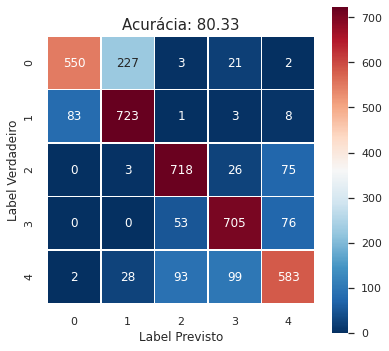

In [39]:
# Selecionando as 10 melhoras features da primeira versao do modelo
features = feature_importances.reset_index()['index'].head(10)

# Vamos armazenar 'PERFIL' no rótulo (y) e o restante das colunas em X
X = dados[features]
y = dados['PERFIL']

# Realizando o balanceamento dos dados para cada classe usando SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Cria o modelo
modelo_rf_v5 = RandomForestClassifier(random_state      = 42, 
                                      n_estimators      = 2000, 
                                      min_samples_split = 10)


# Treinamento do modelo
modelo_rf_v5.fit(X_train, y_train)

# Previsões para cada classe com dados de teste
rf_y_pred = modelo_rf_v5.predict(X_test)

# Calcula o score com dados de teste
rf_accuracy_v5 = modelo_rf_v5.score(X_test, y_test) * 100

# Print
print("Acurácia :", rf_accuracy_v5)

# Cria a matriz de confusão
conf_matriz_rf = confusion_matrix(y_test, rf_y_pred)
    
# Calcula especificidade e sensibilidade
speci_rf = conf_matriz_rf[0,0] / (conf_matriz_rf[0,0] + conf_matriz_rf[0,1])
sensi_rf = conf_matriz_rf[1,1] / (conf_matriz_rf[1,0] + conf_matriz_rf[1,1])

# Print
print('Sensibilidade :', sensi_rf)
print('Especificidade :', speci_rf)

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz_rf, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(rf_accuracy_v5), size = 15)

# Relatório de Classificação
print(classification_report(y_test, rf_y_pred))

# Parte 07. Avaliação do Desempenho dos Modelos
> Nesta fase estarei comparando cada versao do modelo Random Forest

In [42]:
# Prepara a lista de resultados
metricas = [(rf_accuracy_v1),(rf_accuracy_v2),(rf_accuracy_v3),(rf_accuracy_v4),(rf_accuracy_v5)]

# Cria o dataframe
df_metricas = pd.DataFrame(metricas, 
                           columns = ['Accuracy'], 
                           index = ['Versao 01', 'Versao 02', 'Versao 03', 'Versao 04', 'Versao 05']) 

# Visualiza o resultado
df_metricas

Accuracy
Versao 01  79.729730
Versao 02  79.354354
Versao 03  87.357589
Versao 04  87.677609
Versao 05  80.328270